In [ ]:
Murali Yaswanth Motamarri
700741647

In [61]:
#1. Read the provided CSV file ‘data.csv’

import pandas as pd
import numpy as np

data = pd.read_csv("data.csv")
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [62]:
#2. Show the basic statistical description about the data.
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [63]:
#3. Check if the data has null values.
data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [64]:
#3a. Replace the null values with the mean
data.fillna(data.mean(), inplace=True)
data.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [65]:
#4. Select at least two columns and aggregate the data using: min, max, count, mean.
data.agg({'Pulse':['min','max','count','mean'],'Maxpulse':['min','max','count','mean']})

,Pulse,Maxpulse
min,80.000000,100.000000
max,159.000000,184.000000
count,169.000000,169.000000
mean,107.461538,134.047337


In [66]:
#5. Filter the dataframe to select the rows with calories values between 500 and 1000.

data.loc[(data['Calories']>500)&(data['Calories']<1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
90,180,101,127,600.1


In [67]:
#6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

data.loc[(data['Calories']>500)&(data['Pulse']<100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [68]:
#7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

df_modified = data[['Duration','Pulse','Calories']]
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [69]:
#8. Delete the “Maxpulse” column from the main df dataframe

del data['Maxpulse']
data.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [60]:
#9. Convert the datatype of Calories column to int datatype.

data.dtypes #initially datatype of Calories is float64

Duration      int64
Pulse         int64
Calories    float64
dtype: object

In [19]:
data['Calories'] = data['Calories'].astype(np.int64)
data.dtypes #now datatype of Calories is converted to int64

Duration    int64
Pulse       int64
Calories    int64
dtype: object

<Axes: xlabel='Duration', ylabel='Calories'>

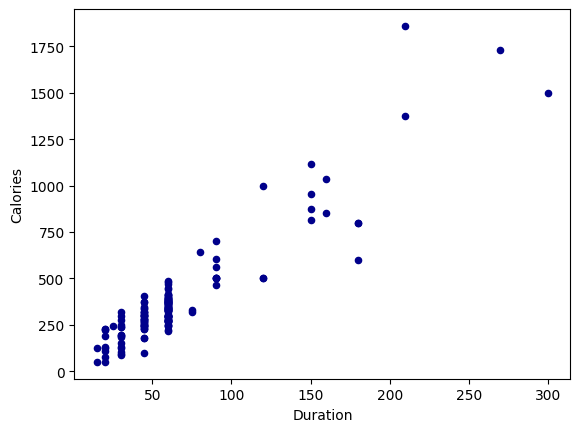

In [20]:
#10. Using pandas create a scatter plot for the two columns (Duration and Calories).

data.plot.scatter(x='Duration',y='Calories',c='DarkBlue')

# 1. (Titanic Dataset)

In [70]:
#1. Find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case inclass
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [71]:
df=pd.read_csv("train.csv")

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex']) #correlation between ‘survived’ and ‘sex’

-0.5433513806577547

In [74]:
#2. Do at least two visualizations to describe or show correlations.
# Drop non-numeric columns from the dataframe
df = df.drop(['Name', 'Sex','Ticket','Cabin','Embarked'], axis=1)

#creating corelation matrix
matrix = df.corr()
print(matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch   
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652  \
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [75]:
#visualization 1
des=df.corr()
df.corr().style.background_gradient(cmap="Greens")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


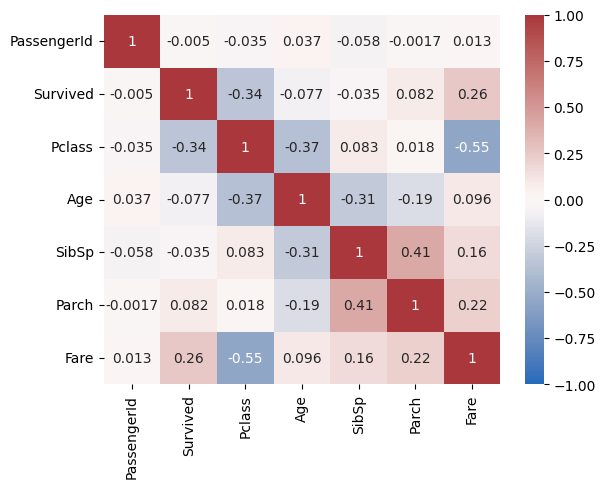

In [76]:
#visualization 2 of Titanic Dataset
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

# 3. Implement Naïve Bayes method using scikit-learn library and report the accuracy.

In [35]:
#Naive Bayes method of Titanic Dataset
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv("train.csv")

# Select features and target
features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

# Preprocess categorical variables
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.65%


# 2. (Glass Dataset)
1. Implement Naïve Bayes method using scikit-learn library.
a. Use the glass dataset available in Link also provided in your assignment.

In [77]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
glass=pd.read_csv("glass.csv") #importing glass dataset from given link

In [78]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [79]:
#visualization 1
des=glass.corr()
glass.corr().style.background_gradient(cmap="Greens")

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

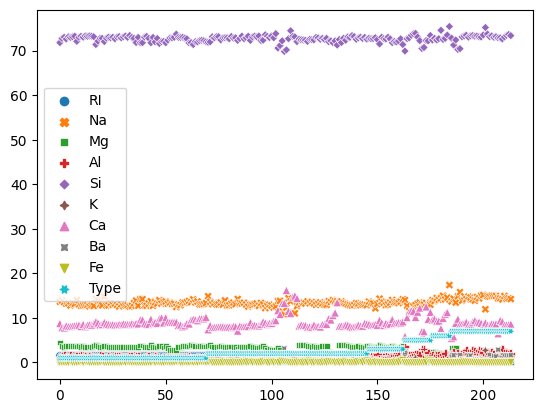

In [80]:
#visualization 2 of Glass Dataset
sns.scatterplot(data=glass)  #ScatterPlot Visualization for above dataset


In [81]:
#Naive Bayes method of Glass Dataset

# Load the dataset
glass_data = pd.read_csv('glass.csv')

# Separate the target variable
X = glass_data.drop(['Type'], axis=1)
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

print("Accuracy Score: {:.2f}%".format(score * 100))
print("\nClassification Report:\n", report)


Accuracy Score: 55.81%

Classification Report:
               precision    recall  f1-score   support

           1       0.41      0.64      0.50        11
           2       0.43      0.21      0.29        14
           3       0.40      0.67      0.50         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.56        43
   macro avg       0.60      0.63      0.59        43
weighted avg       0.55      0.56      0.53        43



In [44]:
#Linear SVM method of Glass Dataset
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
#To avoid warnings
warnings.filterwarnings("ignore")

# Load the dataset
glass_data = pd.read_csv('glass.csv')

# Separate the target variable
X = glass_data.drop(['Type'], axis=1)
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear SVM model
model = LinearSVC(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
report = classification_report(y_test, y_pred)

print("Accuracy Score: {:.2f}%".format(score * 100))
print("\nClassification Report:\n", report)

Accuracy Score: 51.16%

Classification Report:
               precision    recall  f1-score   support

           1       0.37      1.00      0.54        11
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         3
           7       0.80      1.00      0.89         8

    accuracy                           0.51        43
   macro avg       0.36      0.46      0.38        43
weighted avg       0.34      0.51      0.38        43

